In [1]:
#import libraries
# import pandas as pd
import os
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from tqdm import tqdm
from torch import nn, optim
import time  
import torch 
import random
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from datetime import date
from operator import itemgetter
import matplotlib.colors as mcolors
import seaborn as sns
from matplotlib import rcParams
import pandas as pd
import pickle
import utils
import os
import sys

In [2]:
#plot of mae results

In [3]:
# fig, ax= plt.subplots()
# models = ('LSTM','FCN', 'CNN', 'Transformer')
# y_pos = np.arange(len(models))
# mae = [ 1.6884, 1.9207, 0, 0]
# # dtw = [9.000, 8.188, 0.5, 0.5]

# ax.barh(y_pos, mae, align='center')
# ax.set_yticks(y_pos, labels=models)
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Mean Absolute Error (MSE) - degrees')
# ax.set_title('Perfromance in one-step-ahead predictions')


In [4]:
# fig, ax= plt.subplots()
# models = ('LSTM', 'FCN', 'CNN', 'Transformer')
# y_pos = np.arange(len(models))
# # mae = [1.6884, 1.9207, 0.5, 0.5]
# dtw = [9.000, 8.188, 0, 0]

# ax.barh(y_pos, dtw, align='center')
# ax.set_yticks(y_pos, labels=models)
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Dynamic Time Warping (DTW) Distance')
# ax.set_title('Performance in long-term recursive forecasts (200 steps)')

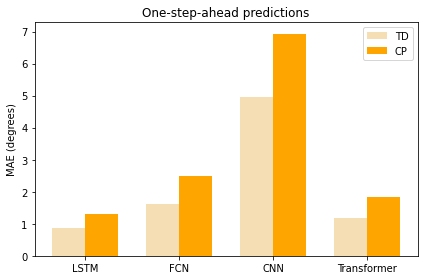

In [5]:
labels = ['LSTM', 'FCN', 'CNN', 'Transformer']
healthy_mae = [ 0.86916, 1.6279, 4.964, 1.1721]
cp_mae = [1.3206, 2.4774, 6.9405, 1.8268]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, healthy_mae, width, label='TD',color='wheat')
rects2 = ax.bar(x + width/2, cp_mae, width, label='CP', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE (degrees)')
ax.set_title('One-step-ahead predictions')
ax.set_xticks(x, labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

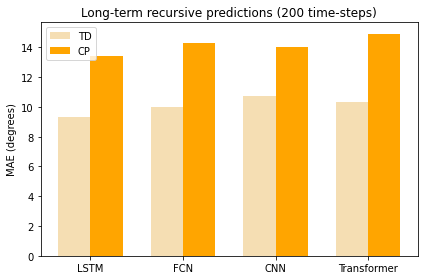

In [6]:
labels = ['LSTM', 'FCN', 'CNN', 'Transformer']
healthy_mae = [9.3557, 10.026, 10.719, 10.308]
cp_mae = [13.411, 14.294, 14.027, 14.934]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, healthy_mae, width, label='TD', color='wheat')
rects2 = ax.bar(x + width/2, cp_mae, width, label='CP',color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE (degrees)')
ax.set_title('Long-term recursive predictions (200 time-steps)')
ax.set_xticks(x, labels)
ax.legend(loc='upper left')

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [7]:
# g_noise = [0, 1, 2, 3, 4, 5]

# healthy_mae_LSTM = [11.076, 11.366, 12.211, 13.202, 14.524, 15.682]
# cp_mae_LSTM = [13.568, 13.74, 14.221, 14.956, 0, 0]

# plt.scatter(x=g_noise, y=healthy_mae_LSTM, marker="o", label="TD")
# plt.plot(g_noise, healthy_mae_LSTM, linestyle="--")
# plt.scatter(x=g_noise, y=cp_mae_LSTM, marker="o", label="CP")
# plt.plot(g_noise, cp_mae_LSTM, linestyle="--")
# plt.ylabel('MAE (degrees)')
# plt.xlabel('Gaussian Noise level (%)')
# plt.title('Long-term Recursive Predictions with Guassian Noise (LSTM)')
# plt.legend()

# plt.show()

In [8]:
# g_noise = [0, 1, 2, 3, 4, 5]

# healthy_mae_FCN = [8.8916, 9.0744, 9.5793, 10.18, 11.078, 12.086]
# cp_mae_FCN = [14.87, 14.931, 15.114, 15.415, 15.803, 16.284]

# plt.scatter(x=g_noise, y=healthy_mae, marker="o", label="TD")
# plt.plot(g_noise, healthy_mae, linestyle="--")
# plt.scatter(x=g_noise, y=cp_mae, marker="o", label="CP")
# plt.plot(g_noise, cp_mae, linestyle="--")
# plt.ylabel('MAE (degrees)')
# plt.xlabel('Gaussian Noise level (%)')
# plt.title('Long-term Recursive Predictions with Guassian Noise (FCN)')
# plt.legend()

# plt.show()

In [9]:
# g_noise = [0, 1, 2, 3, 4, 5]

# healthy_mae_CNN = [10.324, 10.387, 10.601, 10.878, 11.25, 11.727]
# cp_mae_CNN = [14.126, 14.159, 14.256, 14.4, 14.609, 14.873]

# plt.scatter(x=g_noise, y=healthy_mae_CNN, marker="o", label="TD")
# plt.plot(g_noise, healthy_mae_CNN, linestyle="--")
# plt.scatter(x=g_noise, y=cp_mae_CNN, marker="o", label="CP")
# plt.plot(g_noise, cp_mae_CNN, linestyle="--")
# plt.ylabel('MAE (degrees)')
# plt.xlabel('Gaussian Noise level (%)')
# plt.title('Long-term Recursive Predictions with Guassian Noise (FCN)')
# plt.legend()

# plt.show()

In [10]:
# g_noise = [0, 1, 2, 3, 4, 5]

# healthy_mae_trans = [9.9301, 9.9882, 10.157, 10.428, 10.772, 11.191]
# cp_mae_trans = [13.541, 13.577, 13.678, 13.848, 14.075, 14.359]

# plt.scatter(x=g_noise, y=healthy_mae_trans, marker="o", label="TD")
# plt.plot(g_noise, healthy_mae_trans, linestyle="--")
# plt.scatter(x=g_noise, y=cp_mae_trans, marker="o", label="CP")
# plt.plot(g_noise, cp_mae_trans, linestyle="--")
# plt.ylabel('MAE (degrees)')
# plt.xlabel('Gaussian Noise level (%)')
# plt.title('Long-term Recursive Predictions with Guassian Noise (Transformer)')
# plt.legend()

# plt.show()

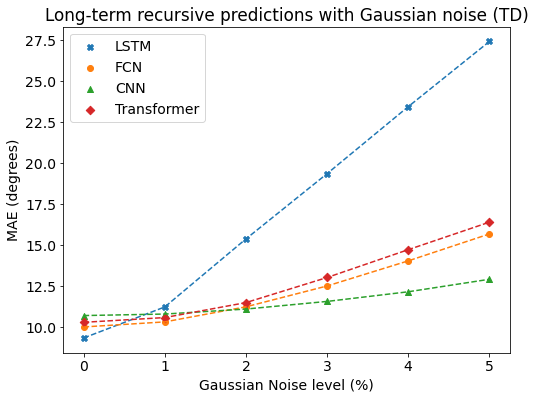

In [26]:
fig = plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})
g_noise = [0, 1, 2, 3, 4, 5]

healthy_mae_LSTM = [9.3557, 11.242, 15.38, 19.351, 23.426, 27.39]
healthy_mae_FCN = [10.026, 10.334, 11.251, 12.519, 14.046, 15.684]
healthy_mae_CNN = [10.719, 10.811, 11.115, 11.579, 12.166, 12.926]
healthy_mae_trans = [10.308, 10.597, 11.507, 13.034, 14.727, 16.4]


plt.scatter(x=g_noise, y=healthy_mae_LSTM, marker="X", label="LSTM")
plt.plot(g_noise, healthy_mae_LSTM, linestyle="--")
plt.scatter(x=g_noise, y=healthy_mae_FCN, marker="o", label="FCN")
plt.plot(g_noise, healthy_mae_FCN, linestyle="--")
plt.scatter(x=g_noise, y=healthy_mae_CNN, marker="^", label="CNN")
plt.plot(g_noise, healthy_mae_CNN, linestyle="--")
plt.scatter(x=g_noise, y=healthy_mae_trans, marker="D", label="Transformer")
plt.plot(g_noise, healthy_mae_trans, linestyle="--")

plt.ylabel('MAE (degrees)')
plt.xlabel('Gaussian Noise level (%)')
plt.title('Long-term recursive predictions with Gaussian noise (TD)')
plt.legend()

plt.show()

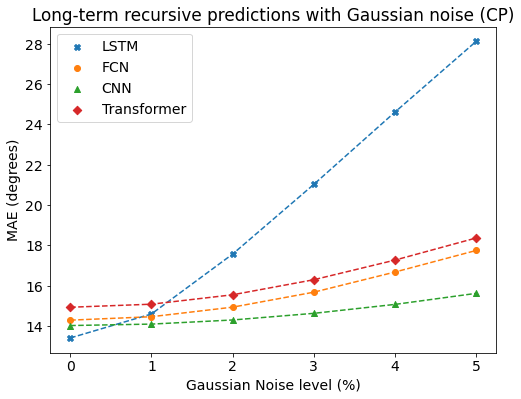

In [25]:
fig = plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})

g_noise = [0, 1, 2, 3, 4, 5]

cp_mae_LSTM = [13.411, 14.6, 17.568, 21.022, 24.606, 28.111] #needs editting
cp_mae_FCN = [14.294, 14.465, 14.938, 15.68, 16.679, 17.748]
cp_mae_CNN = [14.027, 14.099, 14.303, 14.632, 15.075, 15.622]
cp_mae_trans = [14.934, 15.086, 15.552, 16.298, 17.271, 18.367]


plt.scatter(x=g_noise, y=cp_mae_LSTM, marker="X", label="LSTM")
plt.plot(g_noise, cp_mae_LSTM, linestyle="--")
plt.scatter(x=g_noise, y=cp_mae_FCN, marker="o", label="FCN")
plt.plot(g_noise, cp_mae_FCN, linestyle="--")
plt.scatter(x=g_noise, y=cp_mae_CNN, marker="^", label="CNN")
plt.plot(g_noise, cp_mae_CNN, linestyle="--")
plt.scatter(x=g_noise, y=cp_mae_trans, marker="D", label="Transformer")
plt.plot(g_noise, cp_mae_trans, linestyle="--")
plt.ylabel('MAE (degrees)')
plt.xlabel('Gaussian Noise level (%)')
plt.title('Long-term recursive predictions with Gaussian noise (CP)')
plt.legend()

plt.show()

In [ ]:
g_noise = [0, 1, 2, 3, 4, 5]

healthy_mae_FCN = [8.8916, 9.0744, 9.5793, 10.18, 11.078, 12.086]
cp_mae_FCN = [14.87, 14.931, 15.114, 15.415, 15.803, 16.284]
healthy_mae_FCN_MN = [9.9921, 9.9921, 10.773, 11.615, 12.737, 13.881] #manual normalisaiton factors
cp_mae_FCN_MN = [15.468,15.567, 15.858, 16.333, 16.953,17.684,]

plt.scatter(x=g_noise, y=healthy_mae_FCN, marker="x", label="TD-normalisation based on TD")
plt.plot(g_noise, healthy_mae_FCN, linestyle="--")
plt.scatter(x=g_noise, y=cp_mae_FCN, marker="x", label="CP-normalisation based on TD")
plt.plot(g_noise, cp_mae_FCN, linestyle="--")
plt.scatter(x=g_noise, y=healthy_mae_FCN_MN, marker="x", label="TD-normalisation based on exo limits")
plt.plot(g_noise, healthy_mae_FCN_MN, linestyle="--")
plt.scatter(x=g_noise, y=cp_mae_FCN_MN, marker="x", label="CP-normalisation based on exo limits")
plt.plot(g_noise, cp_mae_FCN_MN, linestyle="--")
plt.ylabel('MAE (degrees)')
plt.xlabel('Gaussian Noise level (%)')
plt.title('Long-term Recursive Predictions with Guassian Noise (FCN) for two types of normalisation')
plt.legend()

plt.show()

In [ ]:
folder_name = r'D:\Study 2 Results and Models\Demographics of Children' 
os.chdir(folder_name)
cwd = os.getcwd()
file_name = r'Demographics.xlsx' 


In [ ]:
# h_data = pd.read_excel(file_name, sheet_name='Healthy')


In [ ]:
# h_data

In [ ]:
all_data = pd.read_excel(file_name, sheet_name='all')
all_data

In [ ]:
all_data

In [ ]:
fig = plt.figure(figsize=(6, 4))
gs = fig.add_gridspec(1, 3)
# plt.title('Typically Developing Children Demographics')
ax = fig.add_subplot(gs[0, 0])

sns.boxplot(data=all_data[['TD Height','CP Height']], color='#1f77b4')
ax.set_xticklabels(['TD', 'CP'])
ax.set_ylabel("Height (meters)")

ax = fig.add_subplot(gs[0, 1])
sns.boxplot(data=all_data[['TD Mass', 'CP Mass']], color="#2ca02c")
ax.set_xticklabels(['TD', 'CP'])
ax.set_ylabel("Mass (kg)")

ax = fig.add_subplot(gs[0, 2])
sns.boxplot(data=all_data[['TD Age', 'CP Age']], color="#d62728")
ax.set_xticklabels(['TD', 'CP'])
ax.set_ylabel("Age (years)")


# fig.suptitle('Demographics')
fig.tight_layout()

plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 5))
gs = fig.add_gridspec(1, 3)
# plt.title('Typically Developing Children Demographics')
ax = fig.add_subplot(gs[0, 0])

sns.violinplot(data=all_data[['TD Height','CP Height']], color='#1f77b4')
ax.set_xticklabels(['TD', 'CP'])
ax.set_ylabel("Height (meters)")

ax = fig.add_subplot(gs[0, 1])
sns.violinplot(data=all_data[['TD Mass', 'CP Mass']], color="#2ca02c")
ax.set_xticklabels(['TD', 'CP'])
ax.set_ylabel("Mass (kg)")

ax = fig.add_subplot(gs[0, 2])
sns.violinplot(data=all_data[['TD Age', 'CP Age']], color="#d62728")
ax.set_xticklabels(['TD', 'CP'])
ax.set_ylabel("Age (years)")


# fig.suptitle('Demographics')
fig.tight_layout()

plt.show()

In [ ]:
print(sns.color_palette().as_hex())

In [ ]:
# fig, axs = plt.subplots(1, 2)

# labels=['TD Male', 'TD Female']
# h_size = [4,4]
# explode= (0,0.05)
# fig1, ax1 = plt.subplots()
# ax1.pie(h_size, explode=explode, labels=labels, colors=['steelblue', 'seagreen'],autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# labels=['CP Male', 'CP Female']
# h_size = [7,4]
# explode= (0,0.05)
# fig1, ax1 = plt.subplots()
# ax1.pie(h_size, explode=explode, labels=labels,  colors=['steelblue', 'seagreen'], autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, tight_layout=True, figsize=(9,7))


plt.rcParams['font.size']=15

text_size=15
labels=['Male', 'Female']
h_size = [5,5]
explode= (0,0.05)
axs[0,0].pie(h_size, explode=explode, labels=labels, colors=['steelblue', 'seagreen'],autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0,0].set_xlabel('Typically Developing',size=text_size)
axs[0,0].text(-0.1, 1, 'a', size=20, weight='bold', transform=axs[0,0].transAxes)

# axs[0,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

labels=['Male', 'Female']
h_size = [7,4]
explode= (0,0.05)
axs[0,1].pie(h_size, explode=explode, labels=labels,  colors=['steelblue', 'seagreen'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0,1].set_xlabel('Cerebral Palsy', size=text_size)
axs[0,1].text(-0.1, 1, 'b', size=20, weight='bold', transform=axs[0,1].transAxes)

# axs[0,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



labels=['Hemiplegia', 'Diplegia']
h_size = [7,4]
explode= (0,0.05)
axs[1,0].pie(h_size, explode=explode, labels=labels,  colors=['orange', 'coral'], autopct='%1.1f%%',
        shadow=True, startangle=90)

axs[1,0].text(-0.1, 1, 'c', size=20, weight='bold', transform=axs[1,0].transAxes)

# axs[1,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# axs[1,0].set_xlabel('Cerebral Palsy', size=text_size)


labels=['GMFC I', 'GMFC II']
h_size = [5,6]
explode= (0,0.05)
axs[1,1].pie(h_size, explode=explode, labels=labels,  colors=['orange', 'coral'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1,1].text(-0.1, 1, 'd', size=20, weight='bold', transform=axs[1,1].transAxes)

# axs[1,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# axs[1,1].set_xlabel('Cerebral Palsy', size=text_size)


plt.show()

In [ ]:
fig = plt.figure(figsize=(7, 5))
fig, axs = plt.subplots(2,1)

labels=['Hemiplegia', 'Diplegia']
h_size = [7,4]
explode= (0,0.05)
axs[0].pie(h_size, explode=explode, labels=labels,  colors=['orange', 'coral'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# axs[0].set_xlabel('Typically Developing')
# axs[0,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

labels=['GMFC I', 'GMFC II']
h_size = [5,6]
explode= (0,0.05)
axs[1].pie(h_size, explode=explode, labels=labels,  colors=['orange', 'coral'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# axs[1].set_xlabel('Cerebral Palsy')
# axs[0,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.subplots_adjust(top=0.75)
plt.show()

In [ ]:
labels=['Hemiplegia', 'Diplegia']
h_size = [7,4]
explode= (0,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(h_size, explode=explode, labels=labels,  colors=['orange', 'coral'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
labels=['GMFC I', 'GMFC II']
h_size = [5,6]
explode= (0,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(h_size, explode=explode, labels=labels,  colors=['orange', 'coral'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
##loss curves
train_loss =[
0.027879566,
0.011124399,
0.005680404,
0.004451329,
0.003760349,
0.003263032,
0.002884143,
0.002561162,
0.002294521,
0.002065368,
0.001892203,
0.001741155,
0.001619245,
0.001515403,
0.001420253,
0.00135327,
0.001286865,
0.001230826,
0.00118431,
0.001136817,
0.001091665,
0.001061682,
0.001024448,
0.000999423,
0.000974836,
0.000946036,
0.00092713,
0.000908882,
0.000895205,
0.000864933,
0.000850384,
0.000837211,
0.000823461,
0.000807642,
0.000793876,
0.000784975,
0.000773463,
0.000761892,
0.000751413,
0.000740751,
0.00072849,
0.000720524,
0.000716384,
0.000698036,
0.000689908,
0.000687612,
0.000675692,
0.00067018,
0.000666391,
0.00065925,]

val_loss=[
0.015681008,
0.004040958,
0.003081001,
0.002365125,
0.002008744,
0.001795391,
0.001473219,
0.001326084,
0.001211337,
0.001043953,
0.000979926,
0.000911391,
0.000984963,
0.000814899,
0.000776095,
0.000731835,
0.000714466,
0.000716535,
0.000626281,
0.000698375,
0.000610954,
0.000603285,
0.000568292,
0.000523378,
0.000550053,
0.00050925,
0.000462638,
0.000506558,
0.000474009,
0.00050039,
0.000458005,
0.000529089,
0.000489287,
0.000429671,
0.00045793,
0.000464387,
0.000406694,
0.000510823,
0.000495789,
0.000442568,
0.000425925,
0.000462262,
0.000442191,
0.000430827,
0.000461084,
0.000442286,
0.00045798,
0.000466955,
0.000503218,
0.000551379,]

dtw_distance=[
23.78740342,
11.22077734,
10.33277707,
7.407169079,
8.812570137,
9.067344782,
8.484074277,
7.424833286,
7.210457477,
7.226242152,
8.096385439,
7.579785338,
10.80473244,
6.543281222,
10.1990851,
11.34319596,
11.0686072,
14.95963847,
18.54207499,
15.56168574,
18.72745519,
14.95485169,
16.61456172,
20.51970049,
20.41380272,
19.25157158,
19.35470951,
17.44085437,
19.1673073,
19.27572709,
17.65466042,
20.44062529,
17.26978065,
17.60955483,
18.10713287,
17.01202212,
18.0992355,
19.11099714,
19.54568838,
17.40488933,
18.54852348,
18.21471963,
18.03895933,
18.57102097,
19.13684096,
18.25608829,
18.91158114,
18.96015197,
17.87954376,
18.18216142,]




In [ ]:

fig, ax = plt.subplots(2, 1, figsize=(6, 7))

plt.figure(1)
ax[0].plot(train_loss[:], lw=2, label='Train Loss')
ax[0].plot(val_loss[:], lw=2, label='Val Loss', color='g')
ax[0].text(-0.1, 1, 'a', size=18, weight='bold', transform=ax[0].transAxes)
# ax.plot(lt_loss[:], lw=2, label='Long term prediction Loss')

ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss (MSE)")
ax[0].legend()

ax[1].plot(dtw_distance, lw=2, label='DTW distance', color='orange')
ax[1].text(-0.1, 1, 'b', size=18, weight='bold', transform=ax[1].transAxes)
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("DTW Distance")
plt.legend()
plt.show()

In [ ]:
#paper graphs for literature review 

labels=['Gait Phase', 'Joint angle and trajectory', 'Torque and moment', 'Locomotion mode']
h_size = [35.6,24.4,8.9,31.1]
explode= (0.03,0.05, 0.05, 0.05)
plt.pie(h_size, explode=explode, labels=labels,  colors=['orange', 'slateblue',  'cornflowerblue','green'], autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 18}, radius=1.5)
plt.show()

In [ ]:
labels = ['LSTM', 'FCN', 'CNN', 'Transformer']
healthy_mae = [9.3557, 10.026, 10.719, 10.308]
cp_mae = [13.411, 14.294, 14.027, 14.934]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, healthy_mae, width, label='TD', color='wheat')
rects2 = ax.bar(x + width/2, cp_mae, width, label='CP',color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE (degrees)')
ax.set_title('Long-term recursive predictions (200 time-steps)')
ax.set_xticks(x, labels)
ax.legend(loc='upper left')

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
y=['% of Gait Phase', 'Eight Phases', 'Five Phases', 'Four Phases', 'Two Phases',]
 
# getting values against each value of y
x=[1,1,1,8,5]
plt.figure(figsize=(7,7))  # width:20, height:3
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("Gait Phase Granularity")
 
# setting label of x-axis
plt.xlabel("Number of Papers")
plt.show()